In [32]:
import pandas as pd

# The Building Blocks
years = [2019, 2020, 2021, 2022, 2023, 2024]
url_link = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

team_high_scorers_outliers = {}

for year in years:
    url = url_link.format(year)
    df = pd.read_html(url, header=0)[0]
    df = df.drop(df[df['Age'] == 'Age'].index)

    # Convert 'PTS' column to numeric
    df['PTS'] = pd.to_numeric(df['PTS'], errors='coerce')

    # Calculate average points per game
    avg_pts_per_game = df['PTS'].mean()
    print(f"Average points per game in {year}: {avg_pts_per_game:.2f}")

    # Determine outliers using IQR
    Q1 = df['PTS'].quantile(0.25)
    Q3 = df['PTS'].quantile(0.75)
    IQR = Q3 - Q1
    high_threshold = Q3 + 1.5 * IQR

    # Find high outliers
    high_outliers = df[df['PTS'] > high_threshold]

    # Group players by team
    for index, row in high_outliers.iterrows():
        player_name = row['Player']
        team = row['Tm']
        if team in team_high_scorers_outliers:
            if player_name in team_high_scorers_outliers[team]:
                team_high_scorers_outliers[team][player_name].add(year)
            else:
                team_high_scorers_outliers[team][player_name] = {year}
        else:
            team_high_scorers_outliers[team] = {player_name: {year}}

print("\nHigh Scorers Outliers Grouped by Team:")
for team, player_outliers in team_high_scorers_outliers.items():
    print(f"\nTeam: {team}")
    for player, outlier_years in player_outliers.items():
        outlier_years_str = ', '.join(map(str, outlier_years))
        print(f"  Player: {player}, Outlier Years: {outlier_years_str}")

Average points per game in 2019: 8.38
Average points per game in 2020: 8.46
Average points per game in 2021: 8.62
Average points per game in 2022: 7.81
Average points per game in 2023: 8.86
Average points per game in 2024: 8.02

High Scorers Outliers Grouped by Team:

Team: MIL
  Player: Giannis Antetokounmpo, Outlier Years: 2019, 2020, 2021, 2022, 2023, 2024
  Player: Damian Lillard, Outlier Years: 2024

Team: WAS
  Player: Bradley Beal, Outlier Years: 2019, 2020, 2021, 2022, 2023
  Player: Kristaps Porziņģis, Outlier Years: 2022, 2023

Team: PHO
  Player: Devin Booker, Outlier Years: 2019, 2020, 2021, 2022, 2023, 2024
  Player: Kevin Durant, Outlier Years: 2024, 2023

Team: GSW
  Player: Stephen Curry, Outlier Years: 2019, 2021, 2022, 2023, 2024
  Player: Kevin Durant, Outlier Years: 2019
  Player: D'Angelo Russell, Outlier Years: 2020

Team: NOP
  Player: Anthony Davis, Outlier Years: 2019
  Player: Brandon Ingram, Outlier Years: 2020, 2021, 2022, 2023
  Player: Zion Williamson, Out

In [33]:
import pandas as pd
df = pd.read_csv('nba_high_scorers_outliers.csv')
df.head(25)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,18,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,...,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,2019
1,40,Bradley Beal,SG,25,WAS,82,82,36.9,9.3,19.6,...,1.1,3.9,5.0,5.5,1.5,0.7,2.7,2.8,25.6,2019
2,61,Devin Booker,SG,22,PHO,64,64,35.0,9.2,19.6,...,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6,2019
3,124,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,...,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3,2019
4,126,Anthony Davis,C,25,NOP,56,56,33.0,9.5,18.3,...,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9,2019
5,150,Kevin Durant,SF,30,GSW,78,78,34.6,9.2,17.7,...,0.4,5.9,6.4,5.9,0.7,1.1,2.9,2.0,26.0,2019
6,155,Joel Embiid,C,24,PHI,64,64,33.7,9.1,18.7,...,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5,2019
7,184,Paul George,SF,28,OKC,77,77,36.9,9.2,21.0,...,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0,2019
8,203,Blake Griffin,PF,29,DET,75,75,35.0,8.3,17.9,...,1.3,6.2,7.5,5.4,0.7,0.4,3.4,2.7,24.5,2019
9,207,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,...,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,2019


In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

X = df['FGA']

# Dependent variable (DV): Points Scored
y = df['PTS']

# Add constant term to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PTS   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     141.6
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           5.27e-24
Time:                        23:40:57   Log-Likelihood:                -357.38
No. Observations:                 168   AIC:                             718.8
Df Residuals:                     166   BIC:                             725.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7610      1.723      3.344      0.001       2.359       9.163
FGA            1.0765      0.090     11.900      0.000       0.898       1.255
==============================================================================
Omnibus:                        5.269   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                5.320
Skew:                           0.433   Prob(JB):                       0.0700
Kurtosis:                       2.900   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

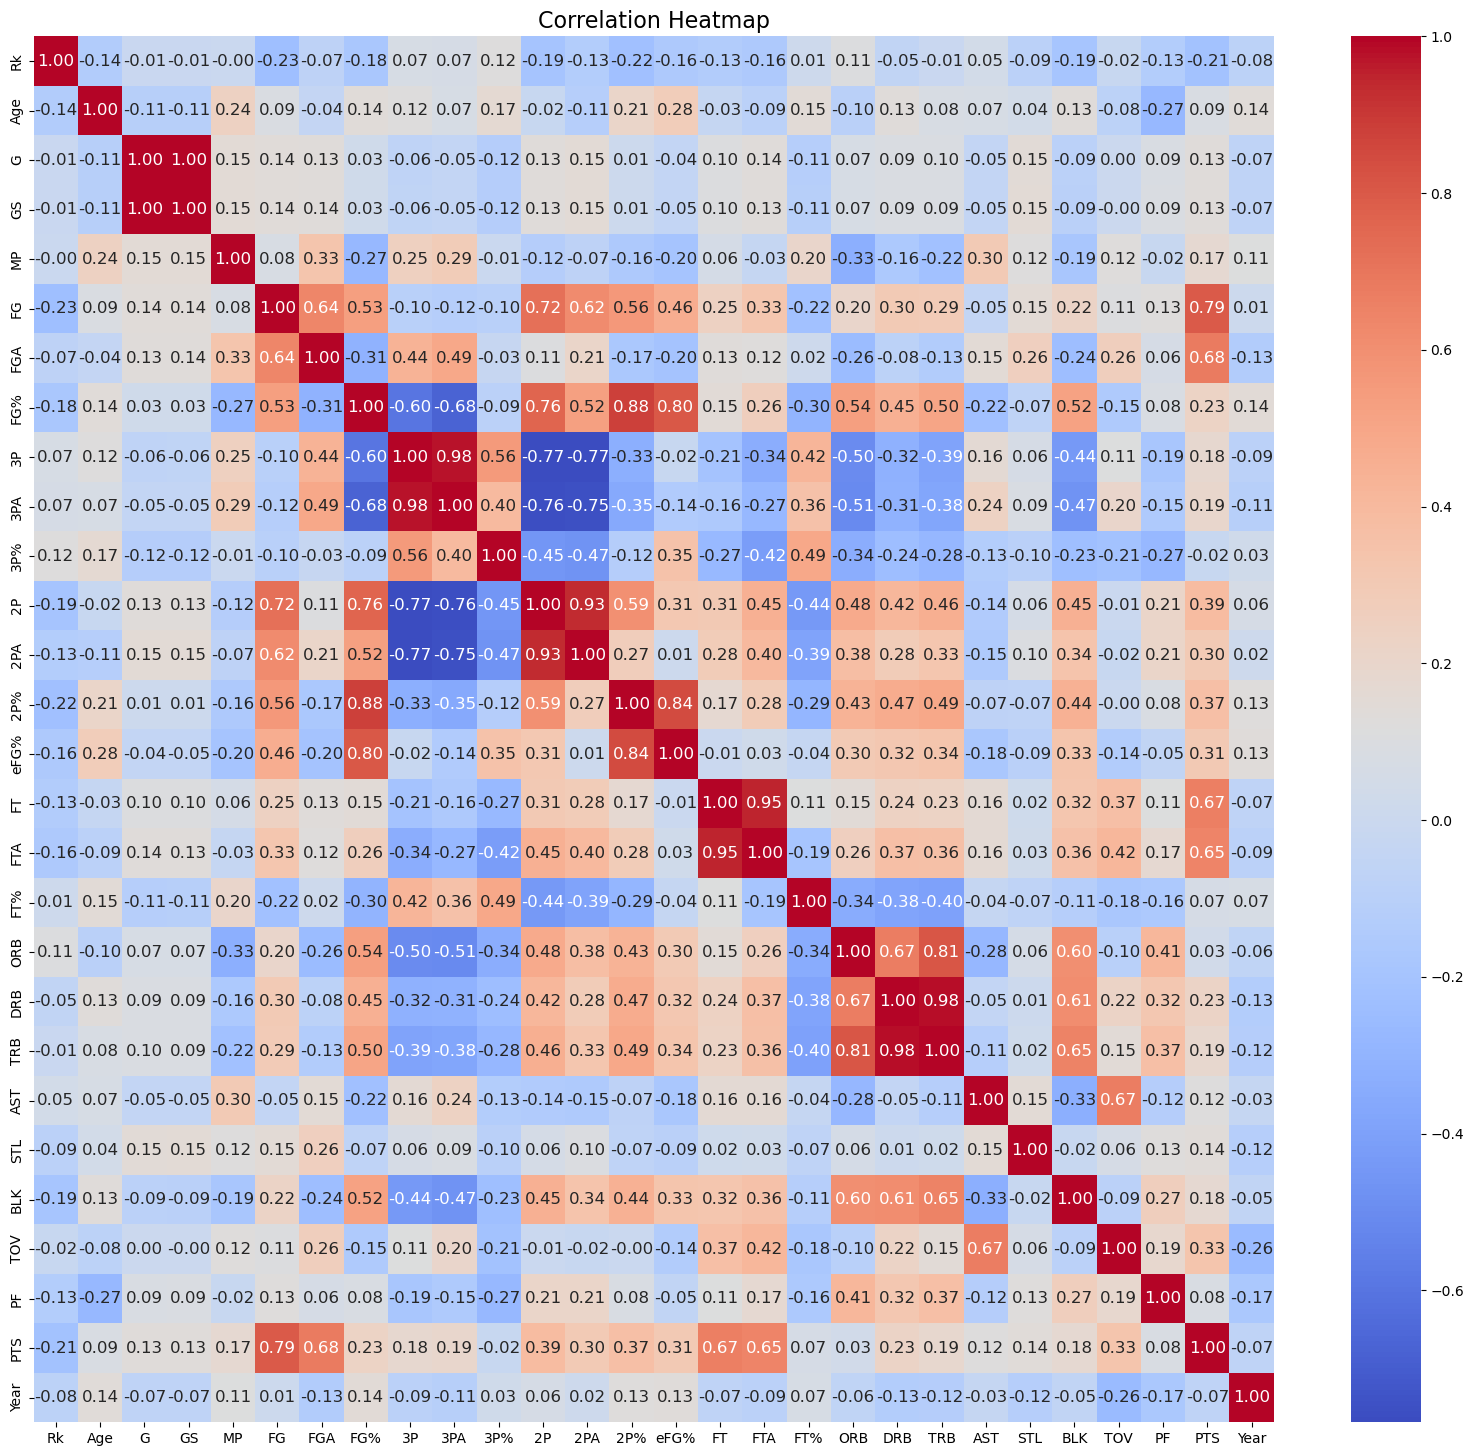

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [36]:
import pandas as pd

points_threshold = 20  # Example threshold (players scoring 20 or more points are considered for All-Star selection)

# Create new column 'AllStarSelection' with binary values
df['AllStarSelection'] = (df['PTS'] >= points_threshold).astype(int)

df.head(25)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,AllStarSelection
0,18,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,...,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,2019,1
1,40,Bradley Beal,SG,25,WAS,82,82,36.9,9.3,19.6,...,3.9,5.0,5.5,1.5,0.7,2.7,2.8,25.6,2019,1
2,61,Devin Booker,SG,22,PHO,64,64,35.0,9.2,19.6,...,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6,2019,1
3,124,Stephen Curry,PG,30,GSW,69,69,33.8,9.2,19.4,...,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3,2019,1
4,126,Anthony Davis,C,25,NOP,56,56,33.0,9.5,18.3,...,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9,2019,1
5,150,Kevin Durant,SF,30,GSW,78,78,34.6,9.2,17.7,...,5.9,6.4,5.9,0.7,1.1,2.9,2.0,26.0,2019,1
6,155,Joel Embiid,C,24,PHI,64,64,33.7,9.1,18.7,...,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5,2019,1
7,184,Paul George,SF,28,OKC,77,77,36.9,9.2,21.0,...,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0,2019,1
8,203,Blake Griffin,PF,29,DET,75,75,35.0,8.3,17.9,...,6.2,7.5,5.4,0.7,0.4,3.4,2.7,24.5,2019,1
9,207,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,...,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,2019,1


For NBA player statistics, the elbow graph can help determine the optimal number of player archetypes or playing styles present in the dataset. Each cluster represents a distinct player archetype, such as scorers, playmakers, and defenders.

Understanding these player archetypes can inform various real-life applications, such as player evaluation, team composition, scouting, recruitment, player development, opponent analysis, and game planning.

For example, coaches and analysts can use the clustering results to identify common characteristics and performance trends among players within each cluster. They can then tailor strategies, training programs, and game plans to leverage the strengths of each player archetype and maximize team performance.

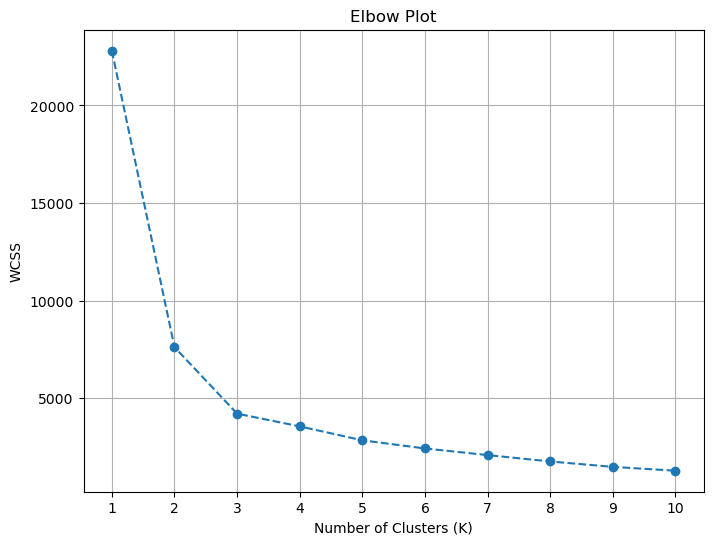

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Filter data for the year 2024
data = data[data['Year'] == 2024]

# Select features
features = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

X = data[features]

# Initialize a list to store inertia values
inertia = []

# Calculate inertia for different values of K
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


The accuracy score reflects the performance of the Random Forest Classifier in correctly predicting the player positions based on the given NBA statistics. Specifically, it measures the proportion of correctly classified instances (or players) out of the total number of instances in the test set.

In the context of this classifier trained on NBA stats, the accuracy score tells us how well the model predicts the positions (e.g., guard, forward, center) of NBA players based on their performance metrics such as age, points scored, rebounds, assists, etc.

For example, an accuracy score of 0.85 indicates that the model correctly predicts the position of 85% of the players in the test set. Higher accuracy scores generally indicate better predictive performance, but it's important to interpret accuracy in the context of the specific problem and dataset.

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data = df[df['Year'] == 2024]

# Select features and target
features = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
target = 'Pos'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.42857142857142855


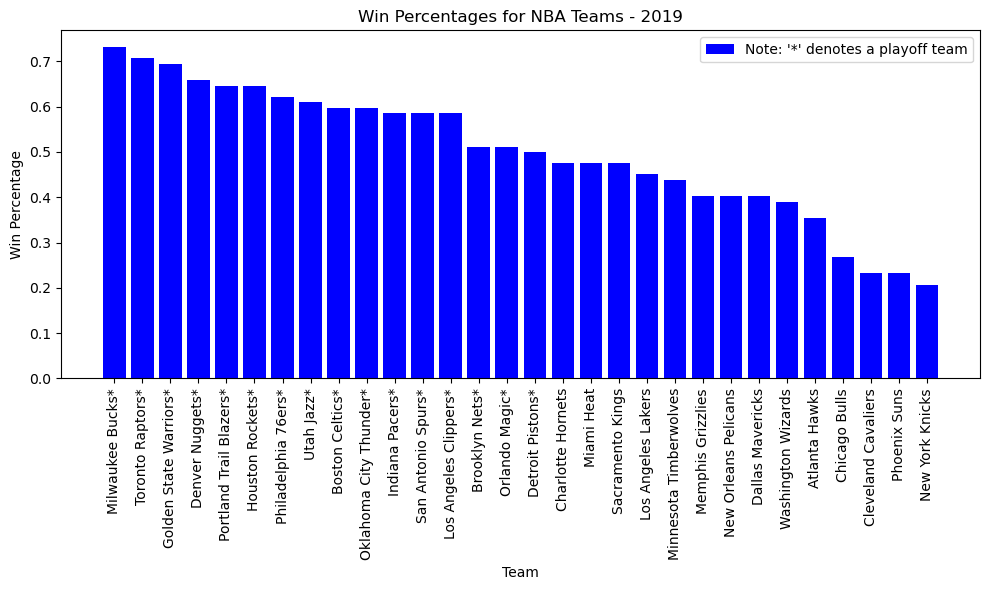

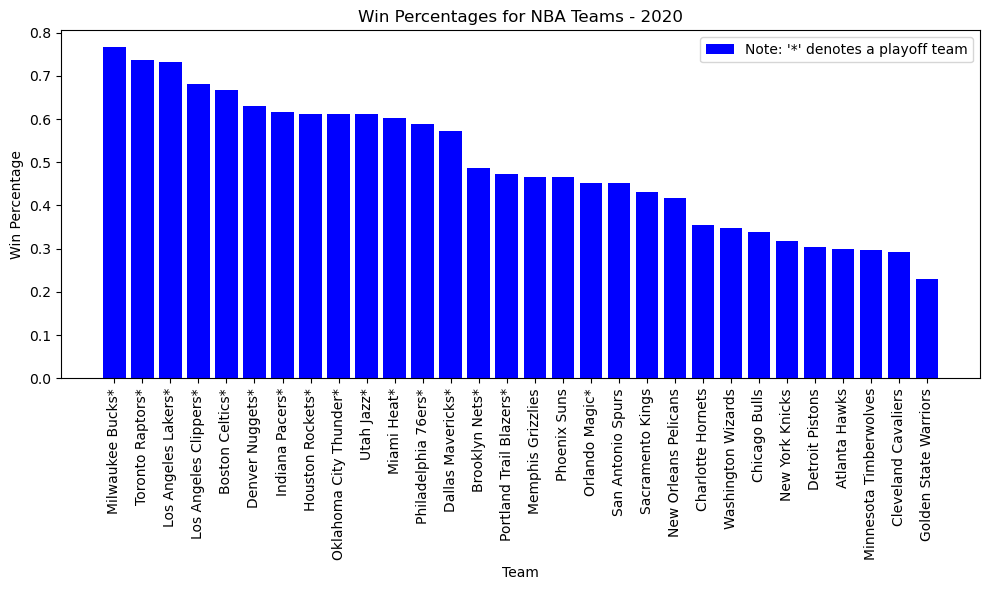

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# The Building Blocks
years = [2019, 2020]
url_link = 'https://www.basketball-reference.com/leagues/NBA_{}.html'

# Initialize lists to store team names and W/L% data for each year
all_teams = []
all_wl_percentages = []

for year in years:
    url = url_link.format(year)
    # Read HTML tables from the URL
    df_list = pd.read_html(url)
    
    # Extract the relevant DataFrames
    df_east = df_list[0]  # Assuming the Eastern Conference table is the first one
    df_west = df_list[1]  # Assuming the Western Conference table is the second one
    
    # Extract team names and W/L% for the current year
    teams = df_east['Eastern Conference'].tolist() + df_west['Western Conference'].tolist()
    wl_percentages = df_east['W/L%'].tolist() + df_west['W/L%'].tolist()
    
    # Append to the lists
    all_teams.append(teams)
    all_wl_percentages.append(wl_percentages)

# Create a legend label indicating "*" denotes a playoff team
legend_label = "Note: '*' denotes a playoff team"

# Plotting teams and W/L% for each year, with both conferences combined and sorted by win percentage
for i, year in enumerate(years):
    plt.figure(figsize=(10, 6))
    
    # Combine and sort teams and win percentages by win percentage
    sorted_teams, sorted_wl_percentages = zip(*sorted(zip(all_teams[i], all_wl_percentages[i]), key=lambda x: x[1], reverse=True))
    
    # Plot all teams
    plt.bar(sorted_teams, sorted_wl_percentages, color='blue', label=legend_label)
    
    # Adding legend with note about playoff teams
    plt.legend(loc='upper right')
    
    plt.title(f'Win Percentages for NBA Teams - {year}')
    plt.xlabel('Team')
    plt.ylabel('Win Percentage')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

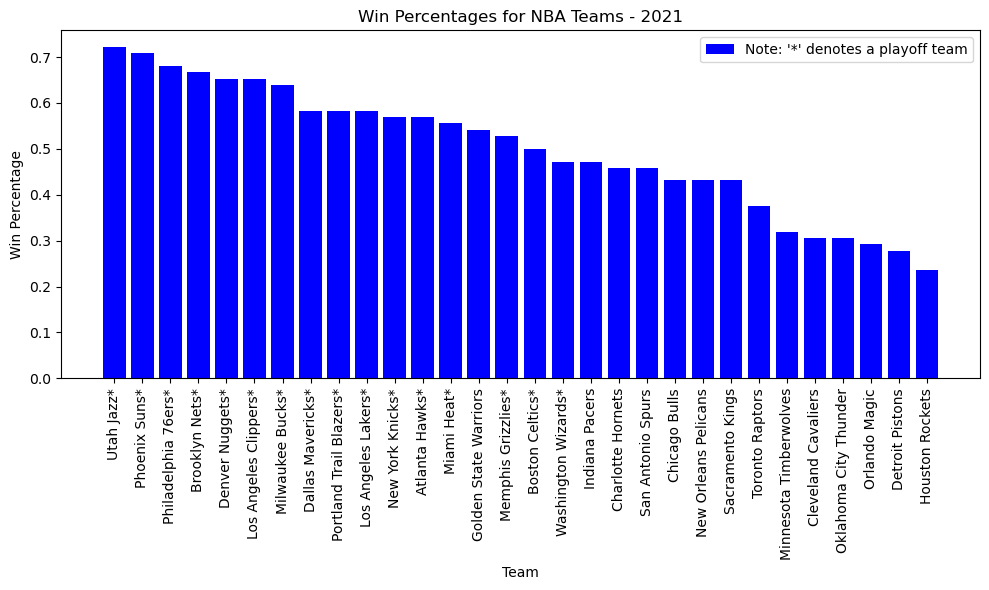

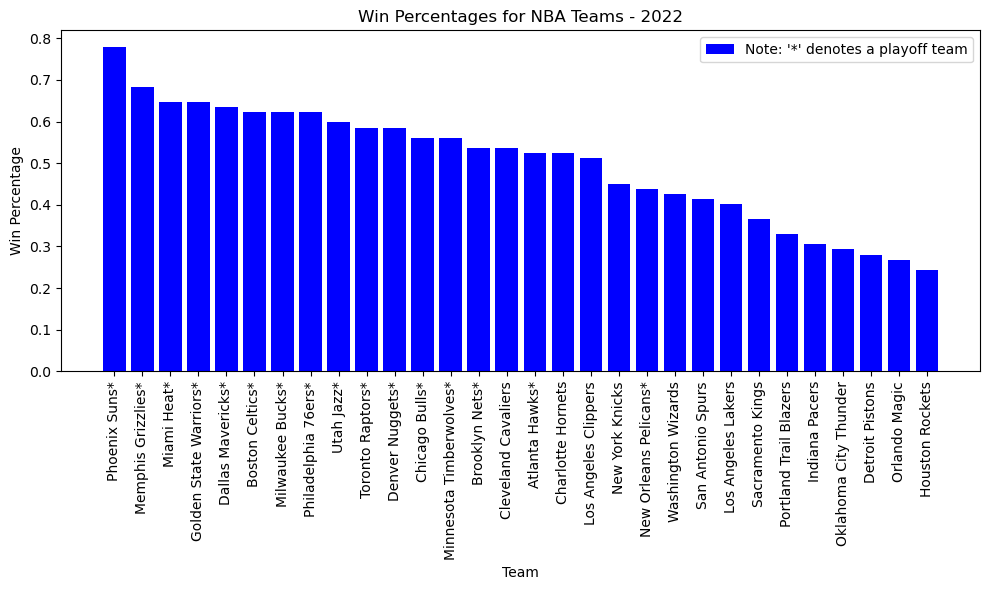

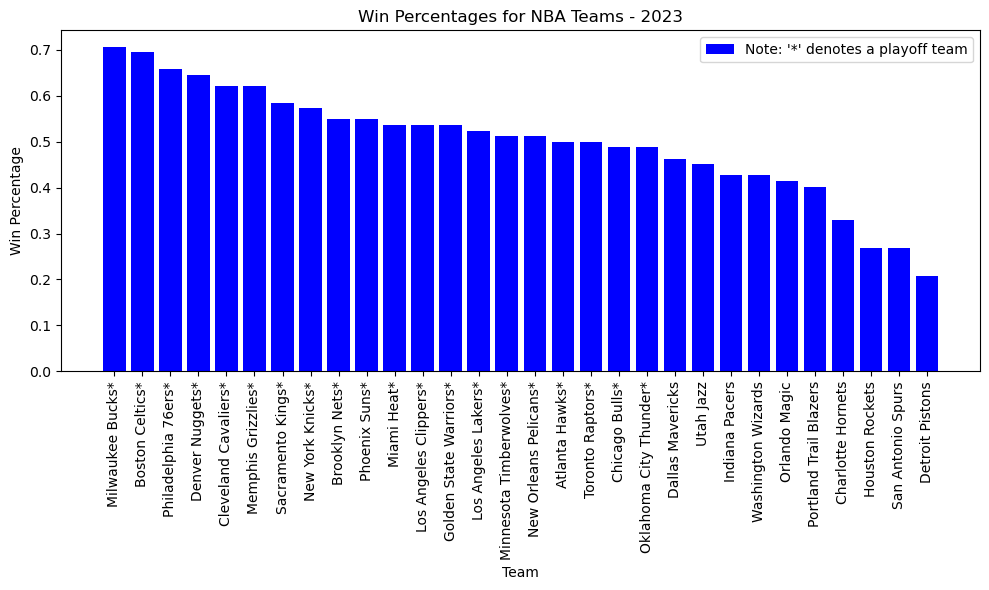

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# The Building Blocks
years = [2021, 2022, 2023]
url_link = 'https://www.basketball-reference.com/leagues/NBA_{}.html'

# Initialize lists to store team names and W/L% data for each year
all_teams = []
all_wl_percentages = []

for year in years:
    url = url_link.format(year)
    # Read HTML tables from the URL
    df_list = pd.read_html(url)
    
    # Extract the relevant DataFrames
    df_east = df_list[0]  # Assuming the Eastern Conference table is the first one
    df_west = df_list[1]  # Assuming the Western Conference table is the second one
    
    # Extract team names and W/L% for the current year
    teams = df_east['Eastern Conference'].tolist() + df_west['Western Conference'].tolist()
    wl_percentages = df_east['W/L%'].tolist() + df_west['W/L%'].tolist()
    
    # Append to the lists
    all_teams.append(teams)
    all_wl_percentages.append(wl_percentages)

# Create a legend label indicating "*" denotes a playoff team
legend_label = "Note: '*' denotes a playoff team"

# Plotting teams and W/L% for each year, with both conferences combined and sorted by win percentage
for i, year in enumerate(years):
    plt.figure(figsize=(10, 6))
    
    # Combine and sort teams and win percentages by win percentage
    sorted_teams, sorted_wl_percentages = zip(*sorted(zip(all_teams[i], all_wl_percentages[i]), key=lambda x: x[1], reverse=True))
    
    # Plot all teams
    plt.bar(sorted_teams, sorted_wl_percentages, color='blue', label=legend_label)
    
    # Adding legend with note about playoff teams
    plt.legend(loc='upper right')
    
    plt.title(f'Win Percentages for NBA Teams - {year}')
    plt.xlabel('Team')
    plt.ylabel('Win Percentage')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assume 'df' is already loaded with your NBA data
import pandas as pd
df = pd.read_csv('nba_high_scorers_outliers.csv')
df.head(25)
# Filter data for the year 2024
data = df[df['Year'] == 2024]

# Select features and target
features = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
target = 'Pos'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

Random Forest Classifier Accuracy: 0.42857142857142855


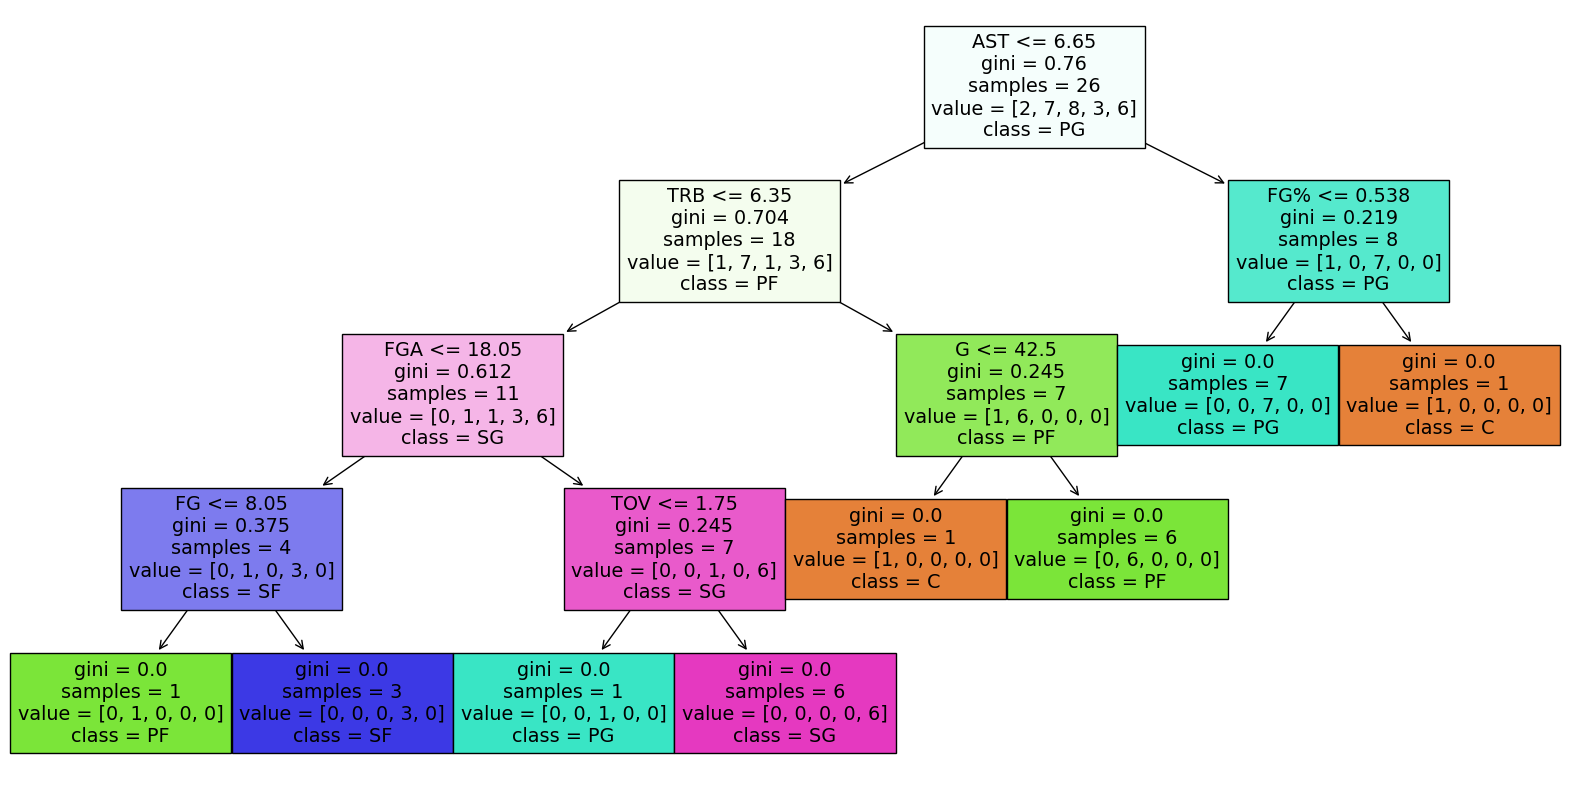

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load NBA data from CSV
df = pd.read_csv('nba_high_scorers_outliers.csv')

# Filter data for the year 2024
data = df[df['Year'] == 2024]

# Select features and target
features = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
target = 'Pos'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=features, class_names=dt_classifier.classes_)
plt.show()=

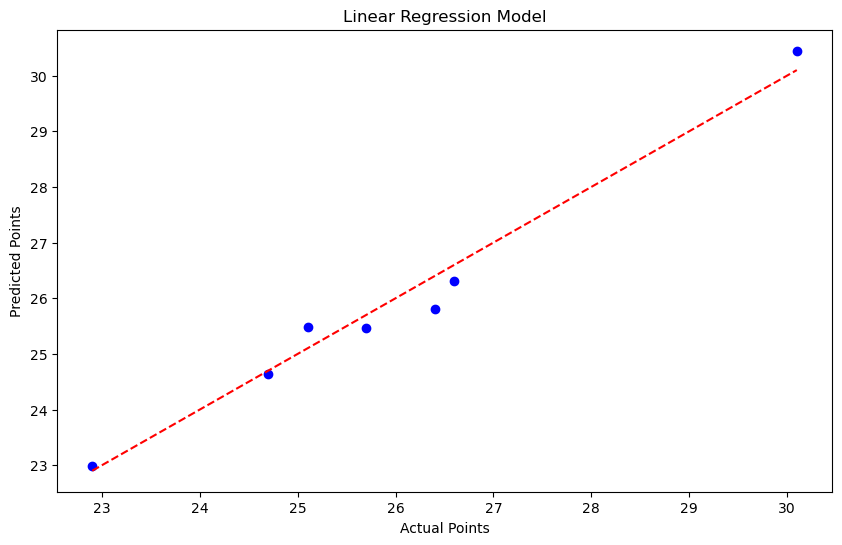

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load NBA data from CSV
df = pd.read_csv('nba_high_scorers_outliers.csv')

# Filter data for the year 2024
data = df[df['Year'] == 2024]

# Select features and target
features = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
target = 'PTS'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions for Linear Regression
y_pred_linear = linear_reg.predict(X_test)

# Plotting the model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Linear Regression Model')
plt.show()

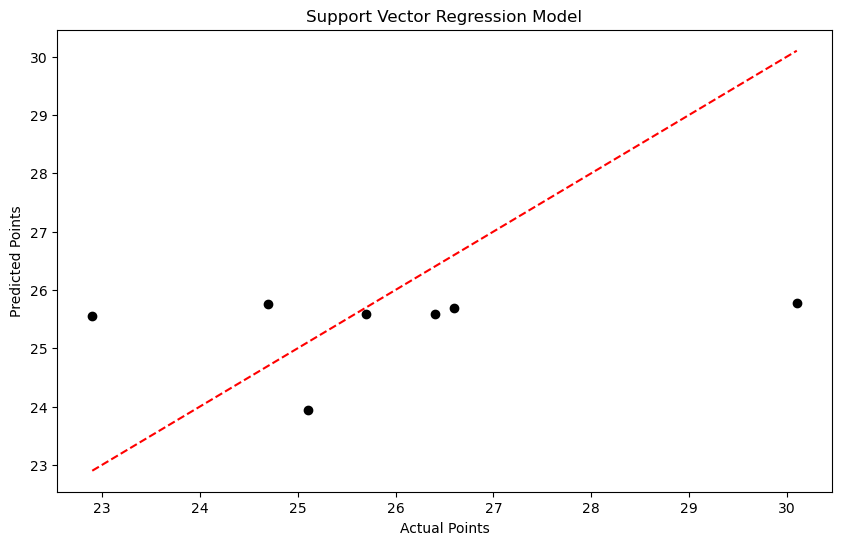

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Load NBA data from CSV
df = pd.read_csv('nba_high_scorers_outliers.csv')

# Filter data for the year 2024
data = df[df['Year'] == 2024]

# Select features and target
features = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
target = 'PTS'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Support Vector Regression model
svm_reg = SVR(kernel='rbf')  # You can experiment with different kernels like 'linear', 'poly', 'rbf', etc.
svm_reg.fit(X_train, y_train)

# Predictions for Support Vector Regression
y_pred_svm = svm_reg.predict(X_test)

# Plotting the model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svm, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Support Vector Regression Model')
plt.show()

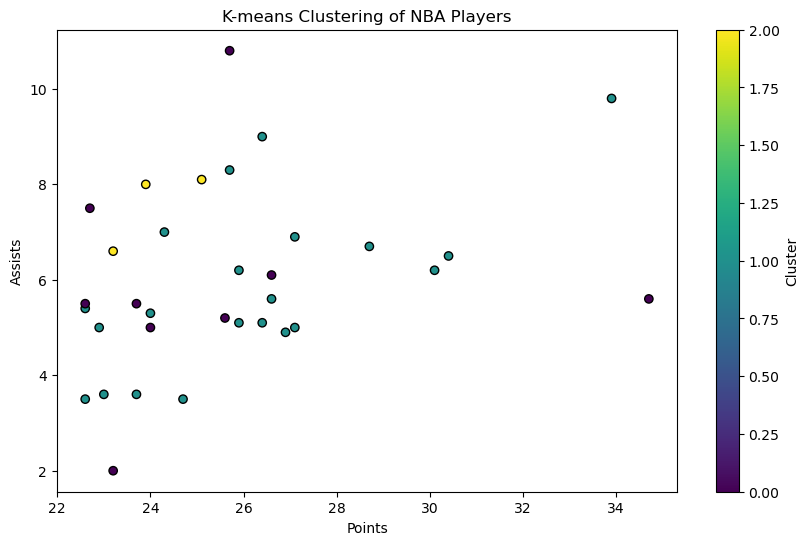

In [60]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings

# Load NBA data from CSV
df = pd.read_csv('nba_high_scorers_outliers.csv')

# Filter data for the year 2024
data = df[df['Year'] == 2024]

# Select features for clustering
features = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
X = data[features]

# Suppress warnings
warnings.filterwarnings("ignore")

# Initialize and fit K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get cluster labels and add them to the dataframe
data['Cluster'] = kmeans.labels_

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['PTS'], data['AST'], c=data['Cluster'], cmap='viridis', edgecolor='k')
plt.xlabel('Points')
plt.ylabel('Assists')
plt.title('K-means Clustering of NBA Players')
plt.colorbar(label='Cluster')
plt.show()